In [1]:
import sys 
sys.path.append('../../')  
from main import device_process_measurement_tomography, Quantities, Cross_Quantities
import QuantumTomography as qt 
import matplotlib.pyplot as plt 
import numpy as np 
from qiskit import QuantumCircuit, Aer, IBMQ 
from qiskit.compiler import transpile 
import json 
from qiskit.result import Result 
from qiskit.test.mock import FakeCasablanca 
from utils_qiskit import * 
from qiskit.providers.ibmq.managed import IBMQJobManager

In [2]:
IBMQ.load_account()
provider    = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')
backend     = provider.get_backend('ibm_perth')
job_manager = IBMQJobManager() 

In [3]:
jobs       = '00d3107d150c4856bb145bc3fca2f147-16647947252239227'
result_set = job_manager.retrieve_job_set(jobs, provider).results()
results    = result_set.combine_results()

In [4]:
dpmt = device_process_measurement_tomography( backend )
circuits_dpmt = dpmt.circuits()

In [5]:
results_tomography = dpmt.fit( results, paralell=True, gate_set=True )         
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset                            

In [6]:
choi0=results_single.chois[0]
choi1=results_single.chois[1]
povm0=results_single.povms[0]
povm1=results_single.povms[1]

In [7]:
choi01=results_double[1].chois[1]
povm01=results_double[1].povms[1]


In [8]:
Fs0 = Quantities( povm0, choi0 )
Fs1 = Quantities( povm1, choi1 )
Fs01 = Quantities( povm01, choi01 )

In [9]:
F0 = Fs0[0]
F1 = Fs1[0]
F01 = Fs01[0]
cF = abs( F01 -F0*F1 ) / abs(F0*F1)


In [10]:
Q0 = Fs0[1]
Q1 = Fs1[1]
Q01 = Fs01[1]
cQ = abs( Q01 -Q0*Q1 ) / abs(Q0*Q1)

In [11]:
cF, cQ

(0.004652789597394703, 0.0007505292661871558)

In [12]:
Cross_Quantities( povm0, choi0, povm1, choi1, povm01, choi01 )

(0.012960976213546024, 0.0096372775865993)

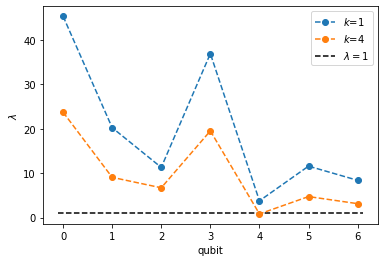

In [13]:
DeltaL = 2**13*( np.sum(np.array(results_single.entropies)[:,1:],1) 
                - np.sum(np.array(results_single.funs)[:,1:],1) )
DeltaN = 4  
lambda_4 = abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN )  
DeltaN = 1
lambda_1 = abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) 

plt.plot( range(7), lambda_1, '--o',label='$k$=1')
plt.plot( range(7), lambda_4, '--o',label='$k$=4')
plt.hlines( 1, -0.1, 6.1, color='black', linestyles='dashed', label='$\lambda=1$'  )
plt.legend()
plt.xlabel('qubit')
plt.ylabel('$\lambda$')
plt.savefig('goodness_of_fit_1q.png')

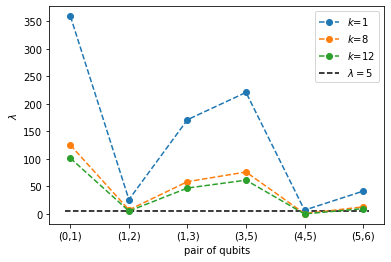

In [14]:
DeltaL = np.abs([ 2**13*( np.sum(np.array(results_double[k].entropies)[:,1:],1) 
                - np.sum(np.array(results_double[k].funs)[:,1:],1) ) for k in range(3) ])
DeltaN = 12
lambda_12 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()
DeltaN = 1
lambda_1 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()
DeltaN = 8
lambda_8 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()

Idx = [3,4,0,2,1,5]
plt.plot( range(6), lambda_1[Idx], '--o',label='$k$=1')
plt.plot( range(6), lambda_8[Idx], '--o',label='$k$=8')
plt.plot( range(6), lambda_12[Idx], '--o',label='$k$=12')
plt.hlines( 5, -0.1, 5.1, color='black', linestyles='dashed', label='$\lambda=5$'  )
plt.xticks( range(6), labels=[ '(0,1)', '(1,2)', '(1,3)', '(3,5)', '(4,5)', '(5,6)' ] )
plt.legend()
plt.xlabel('pair of qubits')
plt.ylabel('$\lambda$')
plt.savefig('goodness_of_fit_2q.png')

In [15]:
DeltaL = np.array([ 2**13*( np.sum(np.array(results_double[k].entropies)[:,1:],1) 
                - np.sum(np.array(results_double[k].funs)[:,1:],1) ) for k in range(3) ])
DeltaL

array([[-121.5237758 ,   -5.50210992],
       [-156.49975194, -254.24909618],
       [ -19.03808898,  -29.8425627 ]])